In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.patches as patches
from ultralytics import YOLO

In [2]:
interpreter = tf.lite.Interpreter(model_path="content/YOLOv11_det_640/yolov11_det_640/weights/best_saved_model/best_float16.tflite")

In [3]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


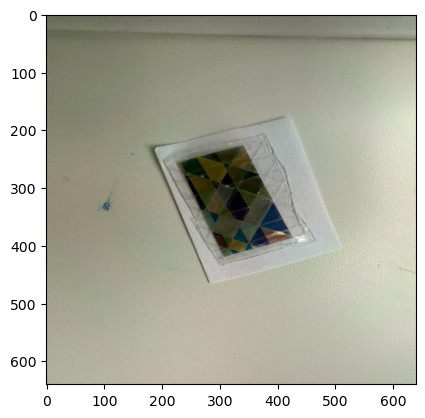

In [4]:
image_path = "dataset/test/images/IMG_7723_jpg.rf.07662daea0eaaaf605094fcc1f340675.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (640, 640))
image = image.astype(np.float32)
image = image/255.0
plt.imshow(image)

In [5]:
input_shape = input_details[0]['shape'][1:3]  # Get expected input shape (height, width)
resized_frame = cv2.resize(image, (input_shape[1], input_shape[0]))  # Resize to model input size
normalized_frame = resized_frame / 255.0  # Normalize pixel values (if required by your model)
input_data = np.expand_dims(normalized_frame, axis=0).astype(np.float32)  # Add batch dimension

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

In [6]:
interpreter.invoke()

In [7]:
output_data = interpreter.get_tensor(output_details[0]['index'])

In [22]:
output_data

array([[[   0.016724,    0.041844,    0.078668, ...,     0.61999,     0.71967,     0.61331],
        [   0.019429,    0.027658,    0.026821, ...,     0.82232,     0.82487,     0.84088],
        [    0.03253,     0.07539,     0.14477, ...,     0.87034,     0.57678,     0.75792],
        [    0.03836,    0.054837,    0.053497, ...,     0.36402,     0.38517,     0.34146],
        [ 0.00074068,  0.00033072,  0.00025415, ...,     0.00102,  0.00098392,  0.00081692]]], dtype=float32)

In [18]:
dummy_output = output_data[0]*100

In [21]:
dummy_output[1].max()

np.float32(98.07535)

In [ ]:
import torch
import torchvision

# Load the TorchScript model
model_path = '/content/drive/MyDrive/yolov5/runs/train/exp6/weights/best.torchscript.ptl'
model = torch.jit.load(model_path)

# Set the model to evaluation mode
model.eval()

# Create a dummy input tensor (e.g., an image of size 640x640 with 3 color channels)
# YOLOv5 typically takes an input image size of 640x640, but adjust if necessary
dummy_input = torch.randn(1, 3, 640, 640)  # batch_size=1, channels=3, height=640, width=640

# Perform a forward pass
with torch.no_grad():
    output = model(dummy_input)

predictions = output[0]
print(predictions.shape)

In [ ]:
tflite_model = YOLO("content/YOLOv11_det_640/yolov11_det_640/weights/best_saved_model/best_float16.tflite", task="detect")

print(tflite_model.model.)
# Run inference
# results = tflite_model(image)

YOLO()
